[Paper with the protocol](https://arxiv.org/abs/1104.3107v2)

## Protocol's induced mapping

<center><img src='img/iter.png' width=500pt/></center>

If we have a state of the form

\begin{equation}
    |\psi\rangle = \mathcal{N(\zeta)} (|00\rangle + \zeta |11\rangle)
\end{equation}

it can be shown that the state after $k$ iterations is 

* $k$ even $$|\psi^{2n} (\zeta)\rangle = \mathcal{N} \left( |00\rangle + f^{\circ 2n} (\zeta) |11\rangle \right)$$
* $k$ odd $$|\psi^{2n+1} (\zeta)\rangle = \mathcal{N} \left(|00\rangle + |11\rangle + f^{\circ 2n+1} (\zeta) ( |01\rangle + |10\rangle) \right)$$


where $$f(\zeta) = \frac{1-\zeta^2}{1+\zeta^2}$$

So, the protocol can be studied directly from this mapping. If $f(\zeta)$ converges to 1 when the iteration is even, then we have an entangled state

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 15})

In [2]:
# Function that returns succesful initial conditions
@njit()
def Entangled_states(niter,grid_step):
    Entangled = [] # List to store the initial conditions for which f->1 with N even
    
    for imag_part in np.arange(-2,2,grid_step): # Imaginary axis 
        for real_part in np.arange(-2,2,grid_step): # Real axis
            
            zeta_0 = real_part + 1.0j*imag_part # Initial conditions filling from left to right and bottom to top
            zeta = zeta_0 # Copy to be propagated through the mapping
        
            for i in range(niter):
                zeta = (1-zeta**2)/(1+zeta**2)
        
            if zeta==1.0:
                Entangled.append(zeta_0) #Storing
                
    return Entangled             

In [4]:
N = 50 # Even iteration
step = 0.005 # Stepsize of the grid

E_states = Entangled_states(N,step)

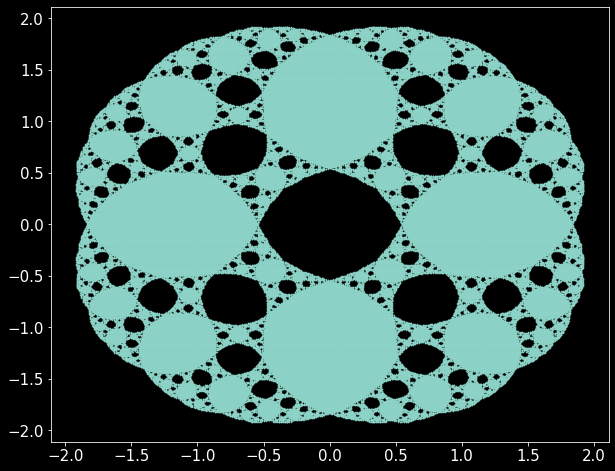

In [5]:
plt.plot(np.real(E_states),np.imag(E_states),'.',markersize=1)

For some values, a small change in the initial condition might determine whether the final state is entangled or not. For example, taking 
$\zeta = 0.543689012692$ and changing it slightly to $\zeta = 0.543689012693$ (only a change of $0.000000000001$) results in completely different behaviour

In [6]:
zeta_1 = 0.543689012692
zeta_2 = 0.543689012693

for i in range(200): # 200 iterations
    zeta_1 = (1-zeta_1**2)/(1+zeta_1**2)
    zeta_2 = (1-zeta_2**2)/(1+zeta_2**2)
    
print("zeta_1 ->", zeta_1, "-> Not entangled")
print("zeta_2 ->", zeta_2, "-> Entangled")

zeta_1 -> 0.0 -> Not entangled
zeta_2 -> 1.0 -> Entangled


To make it more visual, let's bring the code from the previous notebook

In [9]:
from ipynb.fs.full.a_Testing_the_protocol import normalize_state,protocol_prob_distribution,display_state,display_distribution

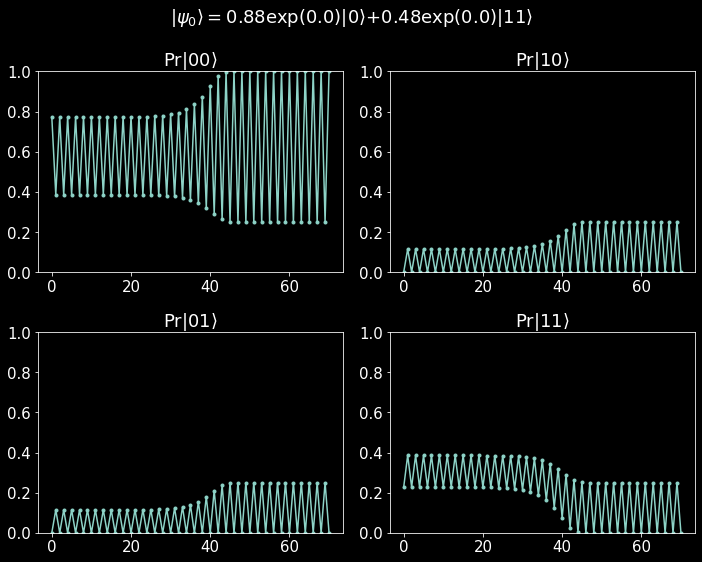

In [10]:
zeta_1 = 0.54368
N = 1/np.sqrt(1+np.abs(zeta_1)**2) # Normalization constant

sv_0 = [N,0,0,N*zeta_1] # Input state

p = protocol_prob_distribution(sv_0,70)
display_distribution(p,sv_0)

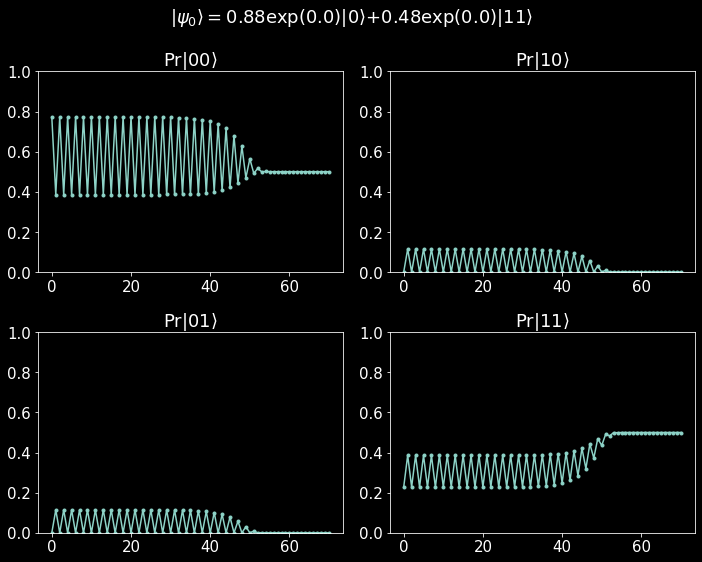

In [11]:
zeta_2 = 0.54369
N = 1/np.sqrt(1+np.abs(zeta_2)**2) # Normalization constant

sv_0 = [N,0,0,N*zeta_2] # Input state

p = protocol_prob_distribution(sv_0,70)
display_distribution(p,sv_0)